## Final Project Due Last Day of Finals
Wednesday, May 8

## 10.8.6, 10.8.19
## 11.7.6, 11.7.8
## 15.7.2, 15.7.12

## 10.8.6
Monomial basis:
n = 3, (−1,1),(0,1),(1,2),(2,0)
$$
\begin{align}
p_{3}(-1) = c_{0} - c_{1} + c_{2} - c_{3} = 1,
p_{3}(0) = c_{0} = 1,
p_{3}(1) = c_{0} + c_{1} + c_{2} + c_{3} = 2,
p_{2}(2) = c_{0} + c_{1}*2 + c_{2}*4 + c_{3}*8 = 0
\end{align}

$$
which yields the following system of equations:
$$
\begin{pmatrix}1 & -1 & 1 & -1\\1 & 0 & 0 & 0\\1 & 1 & 1 & 1\\1 & 2 & 4 & 8\end{pmatrix}\begin{pmatrix}c_{0}\\c_{1}\\c_{2}\end{pmatrix} = \begin{pmatrix}1\\1\\2\\0\end{pmatrix}
$$
with solutions
$$
\begin{pmatrix}1\\7/6\\1/2\\-2/3\end{pmatrix}
$$
and polynomial
$$
p_{3}(x) = 1 + 7/6x + 1/2x^2 -2/3x^3
$$
Lagrange:
n = 3, (−1,1),(0,1),(1,2),(2,0)

$$
L_0(x) = -1/6(x)(x-1)(x-2)
$$
$$
L_1(x) = 1/2(x+1)(x-1)(x-2)
$$
$$
L_2(x) = -(x+1)(x)(x-2)
$$
$$
L_3(x) = 0
$$
$$
p_3(x) = -1/6(x)(x-1)(x-2) + 1/2(x+1)(x-1)(x-2) - (x+1)(x)(x-2) = 1 + 7/6x + 1/2x^2 -2/3x^3
$$

Newton:
$$
p0 = 1
$$
$$
p1 = x+1
$$
$$
p2 = (x+1)(x)
$$
$$
p3 = (x+1)(x)(x-1)
$$
$$
p(x) = c0p0 + c1p1 + c2p2 + c3p3, c0=1, c1=0, c2=1/2, c3=-3/2
$$
$$
p(x) = 1 + 1/2(x+1)(x) -2/3(x+1)(x)(x-1) = 1 + 7/6x + 1/2x^2 -2/3x^3
$$


## 10.8.19

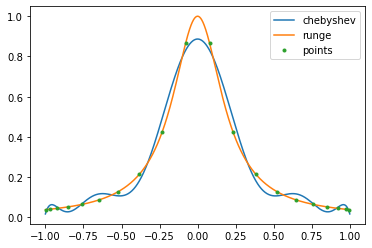

In [6]:
import math, numpy as np
from math import pi as π
import numpy.linalg as LA
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

def chebyshev(a,b,n):
    return np.cos(π * np.arange(1,2*n+1,2)/(2*n))*(a-b)/2 + (a+b)/2

t = np.linspace(-1,1,1000)
runge = lambda x: 1/(1+25*x**2)
cx = chebyshev(-1,1,20)
cy = runge(cx)
cheby = Polynomial.fit(cx,cy,10)
plt.plot(t,cheby(t),label='chebyshev')
plt.plot(t,runge(t),label='runge')
plt.plot(cx,cy,'.',label='points')
plt.legend()


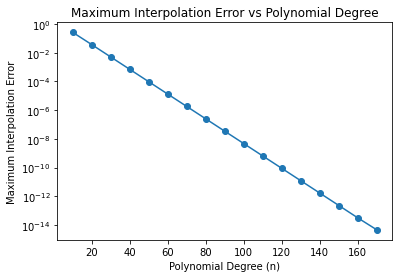

In [10]:
from scipy.interpolate import barycentric_interpolate

def max_interp_error(n):
    cheb_pts = chebyshev(-1,1,n)
    x_uniform = np.linspace(-1, 1, 2001)
    y_uniform = runge(x_uniform)
    y_interp = barycentric_interpolate(cheb_pts, runge(cheb_pts), x_uniform)
    error = np.max(np.abs(y_uniform - y_interp))
    return error

n_values = np.arange(10, 171, 10)
errors = [max_interp_error(n) for n in n_values]

plt.semilogy(n_values, errors, marker='o')
plt.title('Maximum Interpolation Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Maximum Interpolation Error')
plt.show()


## 11.7.8

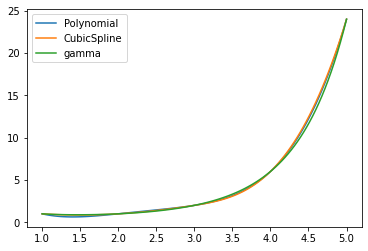

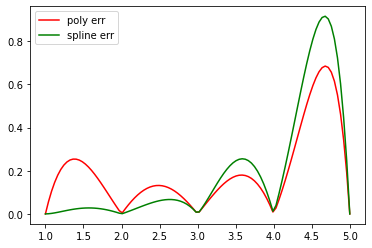

In [38]:
from scipy.interpolate import CubicSpline
from scipy.special import gamma
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1, 1, 2, 6, 24])

p = Polynomial.fit(x_data,y_data,4)
y_cs = CubicSpline(x_data,y_data)

x_plot = np.linspace(1,5,100)
y_plot = p(x_plot)
cs_plot = y_cs(x_plot)
y_gamma = gamma(x_plot)

plt.plot(x_plot,y_plot,label='Polynomial')
plt.plot(x_plot,cs_plot,label='CubicSpline')
plt.plot(x_plot,y_gamma,'-',label='gamma')
plt.legend()
plt.show()

err_poly = abs(y_gamma - y_plot)
error_spline = abs(y_gamma - cs_plot)
plt.plot(x_plot,err_poly,'r',label='poly err')
plt.plot(x_plot,error_spline,'g',label='spline err')
plt.legend()

We can see that the spline error tends to be smaller than that of the polynomial. This indicates that the cubic spline is an overall better fit than the polynomial for the given data points.

## 11.7.8


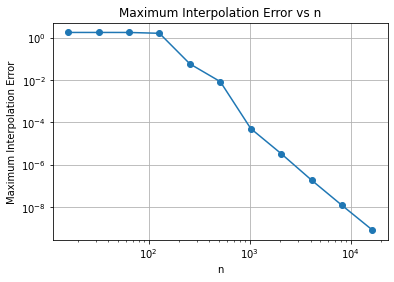

In [39]:
def f(x):
    return np.exp(3*x) * np.sin(200*x**2) / (1 + 20*x**2)

# Function to calculate equidistant points
def equidistant_points(n):
    return np.linspace(0, 1, n+1)

# Function to compute maximum error
def max_error(n):
    x_interp = np.linspace(0, 1, 1001)
    y_actual = f(x_interp)
    
    x_points = equidistant_points(n)
    y_points = f(x_points)
    
    cs = CubicSpline(x_points, y_points)
    y_interp = cs(x_interp)
    
    error = np.max(np.abs(y_interp - y_actual))
    return error

# Calculate maximum errors for different values of n
n_values = [2**j for j in range(4, 15)]
errors = [max_error(n) for n in n_values]

# Plot errors against n using log-log scale
plt.loglog(n_values, errors, marker='o')
plt.title('Maximum Interpolation Error vs n')
plt.xlabel('n')
plt.ylabel('Maximum Interpolation Error')
plt.grid(True)
plt.show()

Similar to exaple 10.8, the error drops precipitously after n=100. When increasing the degree by an order of magnitude afterward, the error drops from an unacceptable range (>1) down to unit rounding level. It also observes spectral accuracy.

## 15.7.2

Assume that $g \in C[a,b]$ and that $\psi$ is an integrable function that is either nonnegative or nonpositive throughout the interval $[a,b]$. Then there is a point $\epsilon \in [a,b]$ such that
$$
\int_a^b g(x)\psi(x) \, dx = g(\epsilon)\int_a^b \psi(x) \, dx
$$
Consider $\gamma(x) = \int_a^x \psi(t) \, dt$, by the fundamental thm of calculus we have
$$
\gamma^{'}(x) = \psi(x), \forall x \in [a,b]
$$
Since $\psi$ is continuous and differentiable over the interval, the intermediate value theorem applies, and we can modify the expression by bounding it by the maximum and minimum values of g:
$$
m\int_a^b \psi(x) \, dx \le \int_a^b g(x)\psi(x) \, dx \le M\int_a^b \psi(x) \, dx
$$
where m and M are the minimum and maximum values taken on by g.
By the IVT, $\exists \epsilon \in [a,b]$ such that
$$
g(\epsilon)\int_a^b \psi(x) \, dx = \int_a^b g(x)\psi(x) \, dx
$$

## 15.7.12

First choose an interval and a desired accuracy, perhaps standard floating point arithmetic, then define a recursive function that checks whether the difference in the trapezoidal sum approximations are less than the desired accuracy. If so, return the sum of the 2 approximations. Otherwise, recursively call the function on the 2 subintervals until you've achieved the desired accuracy. The algorithm adapts the number of subintervals based on local function behavior which may allow for fewer function calls than other fixed interval methods.